# Learning Sensitivity, Specificity, and the Science of Matchmaking

Welcome to the AI-powered ballroom! Here, we don’t just pair hopeful romantics based on instinct—data and a dash of algorithmic magic make every waltz and love story more interesting. Let’s narrate the chapters of this grand AI matchmaking story, using Python code blocks and visual plots so you can follow along both logically and emotionally.

---

## Author Information

**Author:** Srinivasan Panneer  
**Email:** post.srinivasan@example.com  
**Location:** Chennai, Tamil Nadu, India  
**LinkedIn:** [www.linkedin.com/in/srinivasan-p-3b94343b](www.linkedin.com/in/srinivasan-p-3b94343b)  
**GitHub:** [https://github.com/codecached](https://github.com/codecached)  

*This notebook was created to illustrate AI matchmaking concepts using Python simulations and visualizations.*

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Seed for reproducibility
np.random.seed(42)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for plots
plt.style.use('seaborn-v0_8-poster')
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

## Chapter 1: Meet the Cast

In our story, every boy and girl comes with a mix of charming personality traits:
- **Humor**
- **Kindness**
- **Adventure**

Each trait scored from 0 to 10 for 30 boys and 30 girls. Let's also assign some names to our cast to add a personal touch.

In [2]:
# Generate sample boy and girl names
boy_names = ["Jack", "Harry", "Oliver", "George", "Thomas", "Charlie", "Oscar", "Jacob", "William", "James", "Henry", "Leo", "Alfie", "Joshua", "Freddie", "Archie", "Ethan", "Joseph", "Max", "Samuel", "Alexander", "Daniel", "Lucas", "Benjamin", "Mason", "Logan", "Theo", "Harrison", "Jake", "David"]
girl_names = ["Olivia", "Amelia", "Isla", "Ava", "Emily", "Sophia", "Mia", "Grace", "Lily", "Ella", "Isabella", "Charlotte", "Sophie", "Evie", "Poppy", "Ella", "Scarlett", "Ruby", "Daisy", "Alice", "Jessica", "Maya", "Chloe", "Sienna", "Phoebe", "Luna", "Harper", "Matilda", "Zoe", "Imogen"]

# Personality traits
boys = pd.DataFrame({
    'boy_id': range(30),
    'name': boy_names,
    'humor': np.random.randint(0, 11, 30),
    'kindness': np.random.randint(0, 11, 30),
    'adventure': np.random.randint(0, 11, 30)
})
girls = pd.DataFrame({
    'girl_id': range(30),
    'name': girl_names,
    'humor': np.random.randint(0, 11, 30),
    'kindness': np.random.randint(0, 11, 30),
    'adventure': np.random.randint(0, 11, 30)
})

print("Sample of Boys with Personality and Names:")
display(boys.head())
print("\nSample of Girls with Personality and Names:")
display(girls.head())


Sample of Boys with Personality and Names:


,boy_id,name,humor,kindness,adventure
0,0,Jack,6,10,3
1,1,Harry,3,9,1
2,2,Oliver,10,2,5
3,3,George,7,6,5
4,4,Thomas,4,3,9



Sample of Girls with Personality and Names:


,girl_id,name,humor,kindness,adventure
0,0,Olivia,7,4,3
1,1,Amelia,10,2,10
2,2,Isla,2,0,9
3,3,Ava,0,4,6
4,4,Emily,7,9,8


## Chapter 2: Chemistry—Calculated by Compatibility

Compatibility is the secret sauce here: the smaller the difference in personality traits, the stronger the chemistry score—a "match meter" running from 0 to 10.

In [3]:
def compatibility_score(boy, girl, weights={'humor': 0.4, 'kindness': 0.4, 'adventure': 0.2}):
    score = 0
    for trait in weights:
        score += weights[trait] * (10 - abs(boy[trait] - girl[trait]))
    return score


## Why This Formula?

- **Goal:**  
  Quantify how *compatible* two people are, based on numeric personality traits — **humor**, **kindness**, and **adventure** — each scored from 0 to 10.

- **Principle:**  
  We assume that **similarity in personality traits indicates higher compatibility**. In other words, people who are closer in these important traits tend to get along better.

- **Difference to Similarity Conversion:**  
  For each trait, we calculate the **absolute difference** between the boy’s and girl’s trait scores:  
  \[
  \text{difference} = | \text{boy\_trait} - \text{girl\_trait} |
  \]  
  The bigger this difference, the less compatible they are on that particular trait.  
  To convert this difference into a similarity score, we subtract it from the maximum possible trait value (which is 10):  
  \[
  \text{similarity} = 10 - \text{difference}
  \]  
  This means:  
  - If the difference is 0 (perfect match), similarity is 10 (maximum).  
  - If the difference is 10 (complete mismatch), similarity is 0 (no compatibility).

- **Weighting:**  
  Different traits can have different levels of importance for compatibility. For example, humor and kindness might matter more than adventure.  
  So, we assign weights to each trait that sum to 1 (for example, 0.4 for humor, 0.4 for kindness, and 0.2 for adventure). This allows us to emphasize certain traits more when calculating overall compatibility.

- **Final Score:**  
  The **weighted sum** of the similarity scores across all traits gives us the total compatibility score:  
  \[
  \text{compatibility score} = \sum_{\text{trait}} \text{weight}_{\text{trait}} \times \text{similarity}_{\text{trait}}
  \]  
  This produces a single numerical value representing how well matched the two people are based on their personalities.

---

## Chapter 3: Cupid Gets an Upgrade—AI Predictions with a Dash of Noise

All possible boy-girl pairs get their chemistry scores calculated. Then AI predicts their match probability, adding some noise to mimic real world unpredictability.

In [4]:
pairs = []
for b_idx in range(len(boys)):
    for g_idx in range(len(girls)):
        score = compatibility_score(boys.loc[b_idx], girls.loc[g_idx])
        pairs.append({
            'boy_id': b_idx,
            'boy_name': boys.loc[b_idx]['name'],
            'girl_id': g_idx,
            'girl_name': girls.loc[g_idx]['name'],
            'compatibility_score': score
        })

matches = pd.DataFrame(pairs)

# Define true matches with threshold
threshold_true = 7.5
matches['true_match'] = matches['compatibility_score'] >= threshold_true

# Add noise to generate predicted probabilities
noise = np.random.normal(0, 1, len(matches))
matches['predicted_prob'] = np.clip(matches['compatibility_score'] / 10 + noise * 0.15, 0, 1)

print("Sample Matches with Predictions:")
display(matches.sample(5))


Sample Matches with Predictions:


,boy_id,boy_name,girl_id,girl_name,compatibility_score,true_match,predicted_prob
131,4,Thomas,11,Charlotte,7.6,True,0.566318
542,18,Max,2,Isla,5.0,False,0.468497
868,28,Jake,28,Zoe,8.2,True,1.000000
651,21,Daniel,21,Maya,6.0,False,0.638571
866,28,Jake,26,Harper,1.4,False,0.000000


## Chapter 4: The Dance of Thresholds—Tuning Sensitivity and Specificity

In [5]:
def evaluate_threshold(df, thresholds):
    results = []
    for t in thresholds:
        df['predicted_match'] = df['predicted_prob'] >= t
        cm = confusion_matrix(df['true_match'], df['predicted_match'])
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0,0,0,0)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        youden_j = sensitivity + specificity - 1
        results.append({'threshold': t, 'sensitivity': sensitivity, 'specificity': specificity, 'youden_j': youden_j})
    return pd.DataFrame(results)

thresholds = np.linspace(0, 1, 101)
eval_df = evaluate_threshold(matches.copy(), thresholds)
best_threshold_row = eval_df.loc[eval_df['youden_j'].idxmax()]
best_threshold = best_threshold_row['threshold']

print(f"Optimal Threshold: {best_threshold:.3f} (Sensitivity: {best_threshold_row['sensitivity']:.2f}, Specificity: {best_threshold_row['specificity']:.2f})")


Optimal Threshold: 0.730 (Sensitivity: 0.72, Specificity: 0.76)


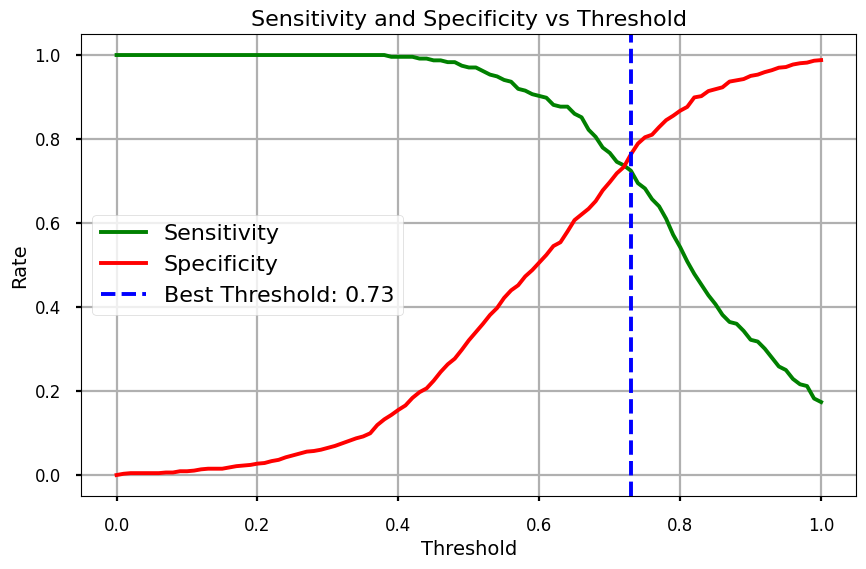

In [6]:
plt.figure(figsize=(10,6))
plt.plot(eval_df['threshold'], eval_df['sensitivity'], label='Sensitivity', color='green')
plt.plot(eval_df['threshold'], eval_df['specificity'], label='Specificity', color='red')
plt.axvline(best_threshold, color='blue', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Sensitivity and Specificity vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


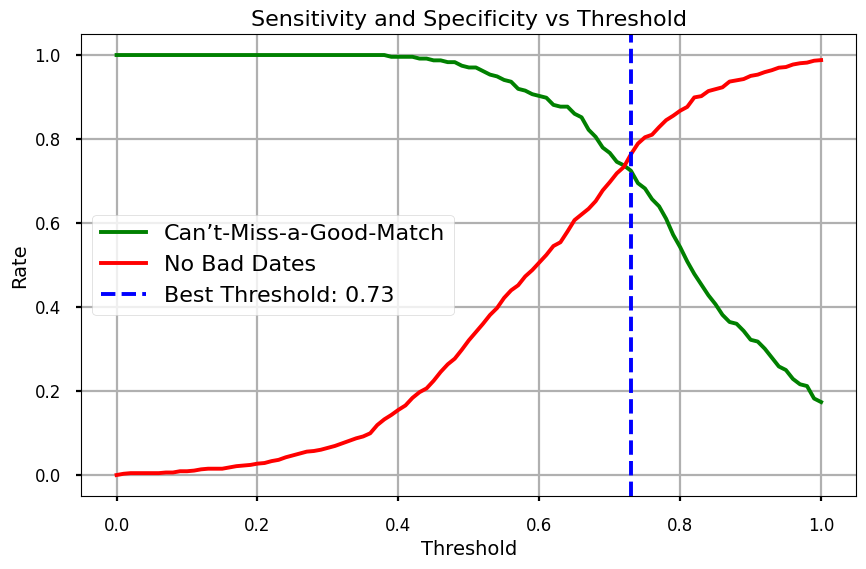

In [7]:
plt.figure(figsize=(10,6))
plt.plot(eval_df['threshold'], eval_df['sensitivity'], label='Can’t-Miss-a-Good-Match', color='green')
plt.plot(eval_df['threshold'], eval_df['specificity'], label='No Bad Dates', color='red')
plt.axvline(best_threshold, color='blue', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Sensitivity and Specificity vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


## Chapter 5: Cupid’s Aim—The ROC Curve

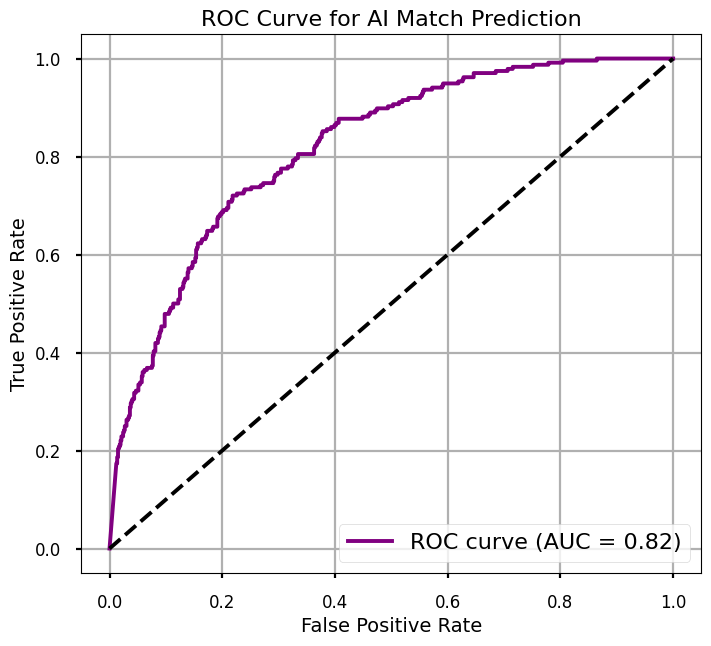

In [8]:
fpr, tpr, _ = roc_curve(matches['true_match'], matches['predicted_prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AI Match Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Understanding the ROC Curve in Our Matchmaking App

The **ROC Curve** (Receiver Operating Characteristic Curve) is a graphical tool used to evaluate the performance of classification models like the one used in our matchmaking app to predict potential matches.

## What is an ROC Curve?

- The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.
- **True Positive Rate (Sensitivity)**: The proportion of actual matches correctly identified by the model.
- **False Positive Rate**: The proportion of non-matches incorrectly classified as matches.

## How Does It Work?

- Our matchmaking model outputs a continuous score indicating how likely two people are to be a good match.
- By changing the threshold score at which we say "this is a match," we get different pairs of TPR and FPR.
- The ROC curve shows these performance trade-offs:  
  - A point closer to the top-left corner of the plot means better performance, with higher TPR and lower FPR.
  - The diagonal line from (0,0) to (1,1) represents random guessing—our goal is to perform better than this.

## Why is it Important?

- It helps us understand the balance between identifying true matches and avoiding false matches.
- The **Area Under the Curve (AUC)** summarizes the overall ability of the model to discriminate matches from non-matches.
  - An AUC of 1 represents a perfect model.
  - An AUC of 0.5 represents a model no better than random chance.

## Example Interpretation

If the curve is very close to the top-left corner:
- Most suggested matches by the app are true matches.
- Very few poor matches are mistakenly suggested.

If the curve is near the diagonal:
- The model is not good at distinguishing between matches and non-matches.
- We might need to improve the algorithm or gather more data.

---

By analyzing the ROC curve, we can fine-tune our matchmaking thresholds to provide better match suggestions and enhance user satisfaction.


## Chapter 6: Matches Made in Heaven

At our optimal threshold, we celebrate the couples the AI predicts will meet their perfect match — the **matches made in heaven**. Let’s reveal the top couples, with charming names attached.

In [9]:
# Get predicted matches at the best threshold
matches['predicted_match_best'] = matches['predicted_prob'] >= best_threshold
heaven_matches = matches[matches['predicted_match_best']]

# Sort by predicted probability, descending
top_matches = heaven_matches.sort_values(by='predicted_prob', ascending=False)

print(f"Top 10 Matches Made in Heaven (at Threshold {best_threshold:.2f}):")
for i, row in top_matches.head(10).iterrows():
    print(f"- {row.boy_name} ❤ {row.girl_name} (Chemistry: {row.compatibility_score:.2f}, AI Probability: {row.predicted_prob:.2f})")

Top 10 Matches Made in Heaven (at Threshold 0.73):
- David ❤ Harper (Chemistry: 9.20, AI Probability: 1.00)
- Harrison ❤ Charlotte (Chemistry: 8.00, AI Probability: 1.00)
- Logan ❤ Scarlett (Chemistry: 8.20, AI Probability: 1.00)
- Theo ❤ Isla (Chemistry: 8.60, AI Probability: 1.00)
- George ❤ Scarlett (Chemistry: 8.80, AI Probability: 1.00)
- Logan ❤ Ella (Chemistry: 9.00, AI Probability: 1.00)
- Oliver ❤ Sophie (Chemistry: 7.40, AI Probability: 1.00)
- Logan ❤ Isabella (Chemistry: 6.80, AI Probability: 1.00)
- George ❤ Sophia (Chemistry: 7.80, AI Probability: 1.00)
- George ❤ Emily (Chemistry: 8.20, AI Probability: 1.00)


In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

matchees_plot = make_subplots(rows=1, cols=1, subplot_titles=["Top Matches Made in Heaven"])

for i, row in top_matches.head(10).iterrows():
    matchees_plot.add_trace(
        go.Scatter(
            x=[row['boy_name']],
            y=[row['girl_name']],
            mode='markers+text',
            text=[f"Chemistry: {row['compatibility_score']:.2f}<br>Prob: {row['predicted_prob']:.2f}"],
            textposition='top center',
            marker=dict(size=12, color='red', symbol='star'),  # changed 'heart' to 'star'
            name=f"{row['boy_name']} & {row['girl_name']}"
        ),
        row=1, col=1
    )

matchees_plot.update_layout(
    height=600, width=800,
    yaxis=dict(title="Girl"),
    xaxis=dict(title="Boy"),
    showlegend=False,
    title_text="Top 10 Matches Made in Heaven"
)

matchees_plot.show()


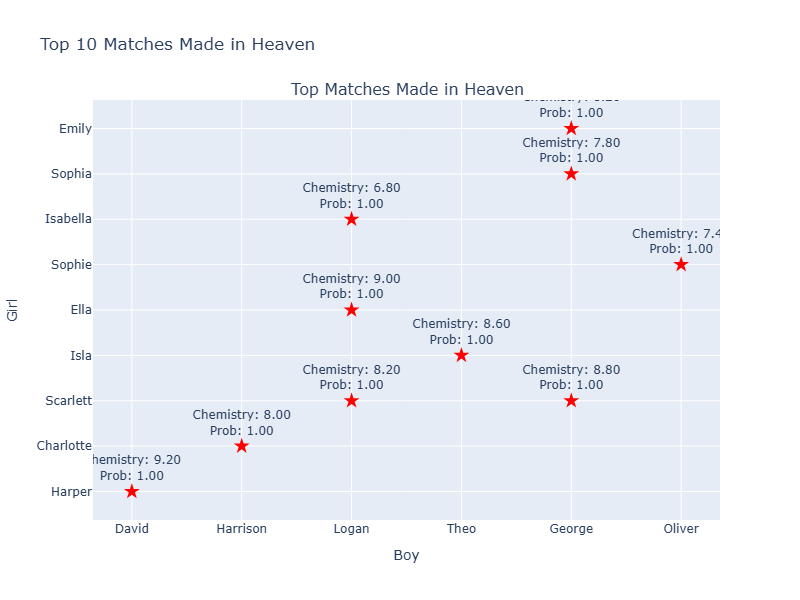

## Epilogue: Lessons from an AI Matchmaker

- AI makes predictions with imperfect info and a touch of randomness, just like real life.
- The **threshold** chosen balances between casting a wide net and being selective; it changes how many matches are declared.
- The AI’s sensitivity and specificity tell us how good it is at finding true matches and avoiding mismatches.
- In the end, love stories emerge not just from data, but from a mix of probabilities, thresholds, and a sprinkle of human unpredictability.

Feel free to adjust thresholds or personality noise to see how the AI's matchmaking creates different stories!

---

### Understanding Sensitivity, Specificity, and Thresholds in AI Dating — A Layman’s Explanation

Ever wondered how an AI matchmaker decides who to pair up in a dating app? Let’s break down the key concepts into simple, real-life terms using the story you just explored in your notebook.

#### Sensitivity: The AI’s “Can’t-Miss-a-Good-Match” Power

- **What it means:** Sensitivity is all about the AI’s knack for spotting those couples who really *should* be together.
- **In dating:** High sensitivity means the AI is eager to catch every possible true couple. It rarely lets a compatible pair slip by. But, being so enthusiastic, it sometimes suggests matches that don’t quite click.

#### Specificity: The AI’s “No Bad Dates” Filter

- **What it means:** Specificity is how well the AI can avoid suggesting matches that wouldn’t work out.
- **In dating:** High specificity means the AI is careful, only matching people it’s sure will vibe well together — which means fewer awkward first dates. However, being too picky, it might leave some great pairs undiscovered.

#### Threshold: The Secret Dial Behind the Scenes

- **What it means:** The “threshold” is like a setting or filter. The AI gives each possible couple a love score (from 0 to 1) — the higher, the better.
- **If the threshold is set low:** The AI says “Yes!” to most couples (high sensitivity, low specificity). More people get matched, but not all will be quality connections.
- **If the threshold is set high:** The AI only pairs the couples with sky-high scores (high specificity, low sensitivity). Matches are more likely to be great, but some soulmates might be missed by chance.

#### Why This Balance Matters in AI Matchmaking

- **You want to meet genuinely compatible people** (high sensitivity) — but you don’t want to waste time on mismatches (high specificity).
- **The “threshold” is how the app balances your experience**. Set too low, you get loads of matches (including many duds). Set too high, you get few matches but probably higher quality.

#### Bringing It Together

Think of sensitivity as “being open to possibilities,” and specificity as “being careful with your choices.” The threshold is your dating filter — controlling how adventurous or selective your matches are.

- **Lower the threshold:** You cast a wider net — more dates, but more risk of disappointment.
- **Raise the threshold:** You’re pickier — fewer dates, but each one has a higher chance of lasting success.

In love (and in AI!), finding the right balance is the secret to great matchmaking.

---

*Now, when you look at the notebook’s matches, plots, and top couples, you’ll know exactly why some pairs made it into the “matches made in heaven” list — and how math, probabilities, and a sprinkle of optimism dance together behind the scenes!*
